# Complex Least-norm Probelm

We consider the complex least $\ell_p$-norm problem,
\begin{equation}
\begin{aligned}
& \underset{x}{\text{minimize}}
& & \mid\mid x \mid\mid_p \\
& \text{subject to}
& & Ax = b \\
\end{aligned}
\end{equation}
where $A \in \mathbb{C}^{m \times n}$ , $b \in \mathbb{C}^m$ , and the variable is $x \in \mathbb{C}^n$. Here $ \mid\mid \cdot \mid\mid_p$ denotes the $\ell_p$-norm on $\mathbb{C}^n$ , defined as
\begin{equation}
\mid\mid x \mid\mid_p = \left( \sum_{i=1}^n \mid x_i \mid^p \right)^{1/p}
\end{equation}
for $p \geq 1$, and $\mid\mid x \mid\mid_\infty = \text{max}_{i=1,...,n} \mid x_i \mid$. We assume $A$ is full rank, and $m < n$.

In [30]:
%matplotlib inline
import numpy as np
np.set_printoptions(precision=5, suppress=True)
import matplotlib.pyplot as plt
from cvxpy import *

## Problem data

For this example, we will use random complex data:
* $A \in \mathbb{C}^{m \times n}$
* $b \in \mathbb{C}^m$

where $m=30$ and $n=100$.

In [35]:
m, n = 30, 100

# Generate complex matrices and generate b in order to the optimization problem been feasible
A = np.random.randn(m,n) + np.random.randn(m,n)*1j
B = np.dot(A, (np.random.randn(n,1) + np.random.randn(n,1)*1j))

print("Random {} {} matrix A".format(A.dtype, A.shape))
print("Random {} {} vector b".format(B.dtype, B.shape))

Random complex128 (30, 100) matrix A
Random complex128 (30, 1) vector b


## Complex least $\ell_2$-norm

Formulate the complex least $\ell_2$-norm problem as a real least $\ell_2$-norm problem:

\begin{equation}
\begin{aligned}
& \underset{z}{\text{minimize}}
& & \mid\mid z \mid\mid_2 \\
& \text{subject to}
& & \begin{bmatrix}
    \mathcal{R}(A)       & -\mathcal{I}(A) \\
    \mathcal{I}(A)       & \mathcal{R}(A)
\end{bmatrix} z = \begin{bmatrix}
    \mathcal{R}(b) \\
    \mathcal{I}(b) \\
\end{bmatrix} \\
\end{aligned}
\end{equation}

where $z = (\mathcal{R}(x), \mathcal{I}(x))$. Note the above constraint is a way to express the complex Affine constraint $Ax=b$ using just real numbers.



In [36]:
# complex least norm problem with reals variables
# build real block matrix from complex matrices
As = bmat([[np.real(A), -np.imag(A)],[np.imag(A), np.real(A)]])
bs = bmat([[np.real(B)], [np.imag(B)]])

# problem declaration
z = Variable(2*n)
obj = Minimize(norm(z, 2))
const = [As * z == bs]
prob = Problem(obj, const)

# solve problem and build complex solution
prob.solve()
x_l2 = z.value[:n] + z.value[n:]*1j
print("Solution status: {}".format(prob.status))
print("Optimal Value p* = {}".format(prob.value))
print("Optimal solution x_l2* = {}".format(x_l2.ravel()))

Solution status: optimal
Optimal Value p* = 9.365647383447863
Optimal solution x_l2* = [[ 0.44282+1.47494j  0.50874-0.0878j   0.90485+0.00964j -0.01219+0.24913j
   0.33121-0.09918j  0.18725+0.35026j -0.51978-0.21255j  1.62108-1.75155j
   0.37482+0.1599j  -0.56742+0.03136j  0.90436+0.30516j  0.27361+0.42419j
   0.48359-0.59624j -0.27781-1.86528j -0.06186+0.05802j  0.72940+0.49482j
   0.51448+0.0882j   0.19520-0.79107j -0.46643-0.6317j  -0.02802-0.31456j
   0.80782-1.19132j -0.76210-0.14395j -0.34185-0.58319j -0.14979-0.23645j
  -0.14058+0.16933j -0.15702-0.74113j -0.66481+1.42959j  0.55917+0.91934j
  -0.41271-0.36844j -0.38681-0.03262j  0.29966-0.896j   -1.01164+0.30275j
   0.64445+0.37056j -0.67330+0.15081j  0.01689-0.05924j -0.32888+0.144j
  -0.14343+0.1839j  -0.34635-0.19074j -0.70778-0.8741j  -0.38533-0.27987j
   0.57602+0.02673j -1.12537-0.15695j  0.19307-0.04299j -1.18250+0.78688j
  -0.26263+0.09509j  0.77904-0.10014j -1.05211+0.31037j  1.54991-0.20797j
  -0.33058-0.646j    1.4042

## Complex least $\ell_\infty$-norm problem

Likewise, formulate the complex least $\ell_\infty$-norm problem:
\begin{equation}
\begin{aligned}
& \underset{z}{\text{minimize}}
& & \mid\mid z \mid\mid_\infty \\
& \text{subject to}
& & \begin{bmatrix}
    \mathcal{R}(A)       & -\mathcal{I}(A) \\
    \mathcal{I}(A)       & \mathcal{R}(A)
\end{bmatrix} z = \begin{bmatrix}
    \mathcal{R}(b) \\
    \mathcal{I}(b) \\
\end{bmatrix} \\
\end{aligned}
\end{equation}


In [37]:
# least norm problem
z = Variable(2*n)
obj = Minimize(norm(z, 'inf'))
const = [As * z == bs]
prob = Problem(obj, const)

# solve problem and build complex solution
prob.solve()
x_linf = z.value[:n] + z.value[n:]*1j
print("Solution status: {}".format(prob.status))
print("Optimal Value p* = {}".format(prob.value))
print("Optimal solution x_linf* = {}".format(x_linf.ravel()))


Solution status: optimal
Optimal Value p* = 0.9349628382852089
Optimal solution x_linf* = [[ 0.93496+0.93496j  0.84244-0.93496j  0.93496-0.17306j  0.93496+0.93496j
   0.53224+0.33125j  0.93496+0.13252j -0.31615-0.93496j  0.93496-0.93496j
   0.76691+0.93496j -0.07632-0.83489j  0.93496+0.84021j  0.93496+0.93496j
   0.43858-0.93496j  0.33038-0.93496j -0.50383+0.69366j  0.93496+0.93496j
   0.93496+0.47289j  0.93496-0.93496j -0.93496-0.93496j  0.93496-0.93496j
   0.93496-0.93496j -0.93496+0.93496j -0.93496-0.93496j -0.93496-0.93496j
  -0.37895+0.93496j  0.15230-0.93496j -0.93496+0.93496j  0.93496+0.93496j
  -0.93496-0.93496j -0.93496+0.70059j  0.93496-0.93496j -0.93496+0.93496j
   0.93496+0.93496j -0.93496+0.26812j -0.68746+0.6924j  -0.93496-0.93496j
  -0.93496+0.55988j -0.93496-0.93496j -0.93496-0.93496j -0.93496-0.71592j
   0.93496+0.26788j -0.93496+0.31834j -0.69629-0.68042j -0.93496+0.93496j
  -0.23705+0.22635j  0.93496-0.83178j -0.93496+0.93496j  0.93496-0.01836j
   0.64602-0.93496j  0

/home/rfsantacruz/.conda/envs/ml_studies_env/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


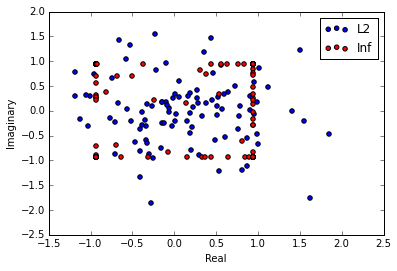

In [43]:
# Plot Solutions
plt.scatter(np.real(x_l2), np.imag(x_l2), c='b')
plt.scatter(np.real(x_linf), np.imag(x_linf), c='r')
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend(['L2', 'Inf'])